# Extreme Poverty

Enlace principal: https://www.kaggle.com/datasets/danofer/wb-poverty

## Context

**Poverty data from the World bank Data includes country and subnational level.**

Datos de pobreza del Banco Mundial Los datos incluyen el nivel nacional y subnacional.

## Content

**Poverty data available at the administrative unit level 1, based on national poverty line(s). Administrative unit level 1 is the highest subnational unit level, e.g. state or province level.**

Datos de pobreza disponibles en el nivel de unidad administrativa 1, basados en la(s) línea(s) nacional(es) de pobreza. El nivel de unidad administrativa 1 es el nivel de unidad subnacional más alto, p. nivel estatal o provincial.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [21]:
from IPython.display import Image

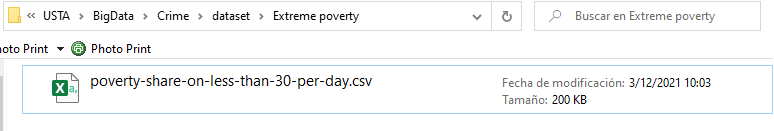

In [22]:
Image("../assets/image/ExtremePoverty.png")

In [25]:
extreme = "../dataset/Extreme poverty/poverty-share-on-less-than-30-per-day.csv"

In [26]:
df = pd.read_csv(extreme)
df.keys()

Index(['Entity', 'Code', 'Year',
       '$30.00 per day - share of population below poverty line'],
      dtype='object')

In [27]:
df.head(3)

,Entity,Code,Year,$30.00 per day - share of population below poverty line
0,Albania,ALB,1981,99.91247
1,Albania,ALB,1982,99.91247
2,Albania,ALB,1983,99.91247


In [28]:
df.shape

(6942, 4)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 4 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Entity                                                   6942 non-null   object 
 1   Code                                                     6395 non-null   object 
 2   Year                                                     6942 non-null   int64  
 3   $30.00 per day - share of population below poverty line  6942 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 217.1+ KB


In [11]:
df.dtypes

Entity                                                      object
Code                                                        object
Year                                                         int64
$30.00 per day - share of population below poverty line    float64
dtype: object

### Entitys

In [30]:
df['Entity'].value_counts()

Albania        39
Norway         39
Myanmar        39
Namibia        39
Nepal          39
               ..
Kosovo         20
Timor          20
Nauru          16
South Sudan    12
Somalia         9
Name: Entity, Length: 183, dtype: int64

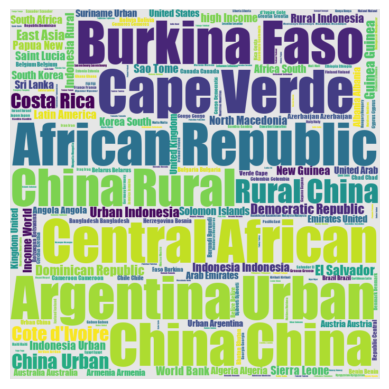

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(i for i in df.Entity)

wc = WordCloud(font_path='impact', width = 700, height = 700, background_color = "#e6e6e6")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [58]:
df_country = pd.DataFrame( {'Count': df["Entity"].value_counts().sort_values(ascending = False)})

In [59]:
display(df_country)

,Count
Albania,39
Djibouti,39
Cape Verde,39
Cameroon,39
Ecuador,39
...,...
Kosovo,20
Timor,20
Nauru,16
South Sudan,12


In [60]:
df_country['Entity'] = df_country.index

In [61]:
display(df_country)

,Count,Entity
Albania,39,Albania
Djibouti,39,Djibouti
Cape Verde,39,Cape Verde
Cameroon,39,Cameroon
Ecuador,39,Ecuador
...,...,...
Kosovo,20,Kosovo
Timor,20,Timor
Nauru,16,Nauru
South Sudan,12,South Sudan


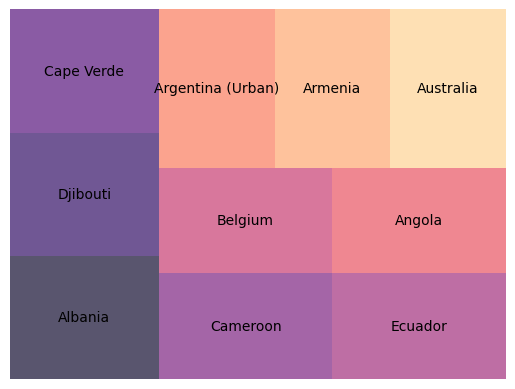

In [62]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

# Sample data
values = df_country['Count'].head(10)
labels = df_country['Entity'].head(10)
colors = sb.color_palette("magma", len(values))

# Treemap
squarify.plot(sizes = values, label = labels,
              color = colors, alpha = 0.7)

# Remove the axis:
plt.axis("off")
plt.show() 

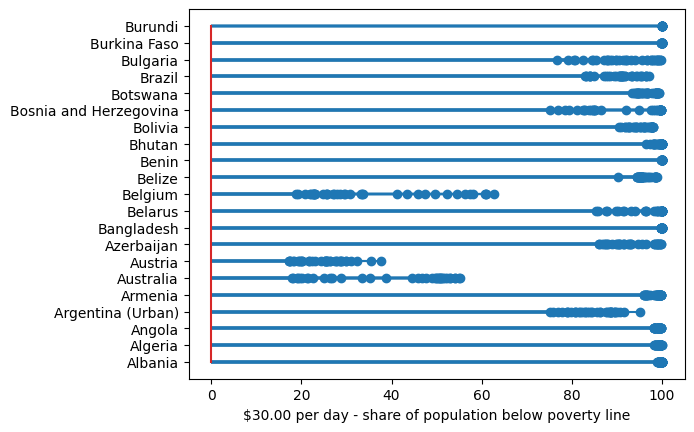

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Data
cantidad = 800
x = df['Entity'].head(cantidad)
y = df['$30.00 per day - share of population below poverty line'].head(cantidad)

# Stem plot
fig, ax = plt.subplots()
ax.stem(x, y, orientation = "horizontal")
plt.xlabel("$30.00 per day - share of population below poverty line")
plt.show() 
